In [1]:
import pandas as pd

# count number of categories per row
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("Meio_compras.csv", sep=";")


In [30]:
# put a [] around the categories

def put_list(x):
    try:
        return [el.strip() for el in str(x).split(",")]
    except:
        return x


df['Meio usado para compras'] = df["Meio usado para compras"].apply(put_list)

df = df.explode('Meio usado para compras')

df = df[df['Meio usado para compras'] != 'nan']

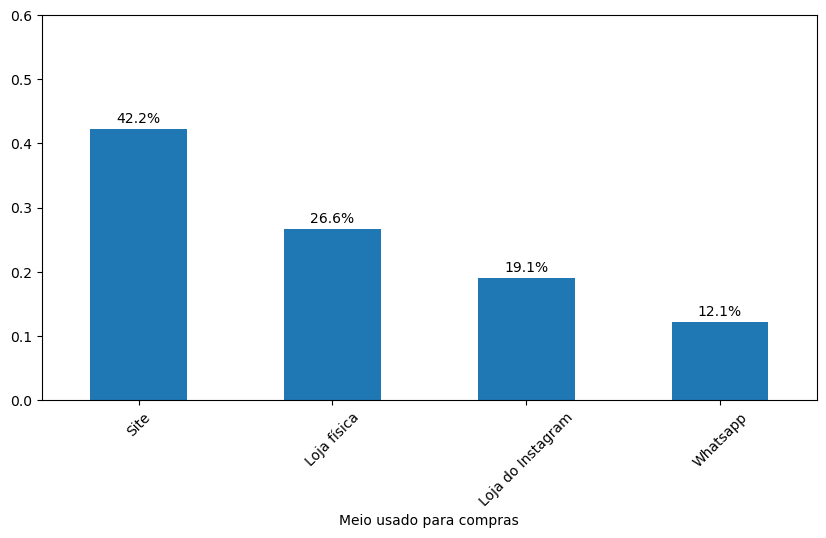

In [74]:
# plot

graph = (df.groupby('Meio usado para compras').size() / df.shape[0]).sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), rot=45)

# percentage show in graph as text
percentages = [
    "{:.1f}%".format(val * 100) for val in (df.groupby('Meio usado para compras').size() / df.shape[0]).sort_values(ascending=False)
]

plt.ylim(0, 0.6)


for i, p in enumerate(graph.patches):
    height = p.get_height()
    graph.text(p.get_x() + p.get_width() / 2., height + 0.01, percentages[i], ha="center")
    i += 1
